In [ ]:
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
input_data

<module 'tensorflow.examples.tutorials.mnist.input_data' from '/usr/local/lib/python3.6/dist-packages/tensorflow/examples/tutorials/mnist/input_data.py'>

In [5]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
mnist
#This shows that mnist has a lot of data in it including training data , validation data and testing data

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7ff35e62f438>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7ff3571167f0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7ff357116588>)

In [7]:
mnist.train.images.shape,mnist.test.images.shape,mnist.validation.images.shape

((55000, 784), (10000, 784), (5000, 784))

In [8]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [9]:
#Now we want out output class to be one hot encoded....this means that if the output of the first digit is 7 then the tuple
#corresponding to it should be like [0,0,0,0,0,0,0,1,0,0] 
#for this while loading the data we pass one argument while loading the data as [one_hot=True].
mnist.train.labels.shape
#Now each label is a vector of size 10

(55000, 10)

In [ ]:
train_images=mnist.train.images.reshape(55000,28,28)

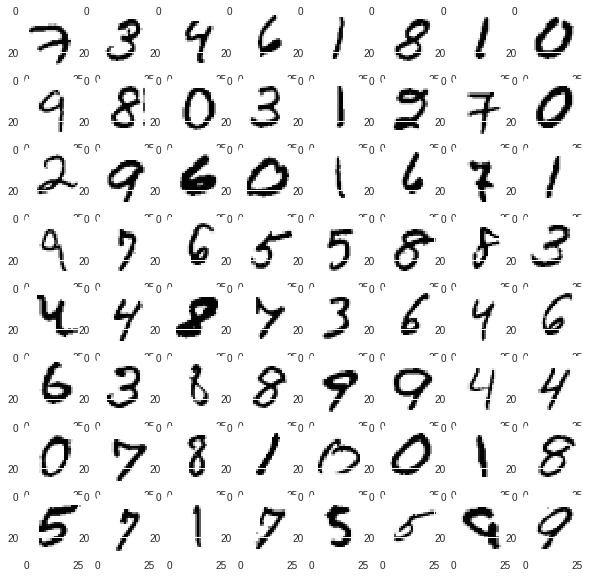

In [11]:
#Plotting images
fig=plt.figure(figsize=(10,10))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(train_images[i])
    
plt.show()

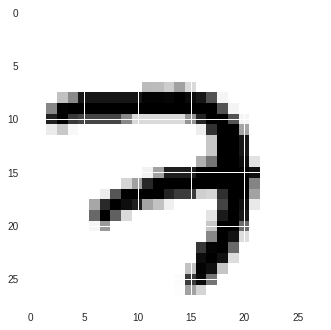

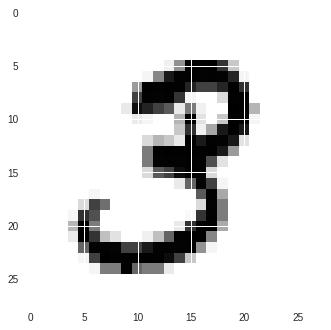

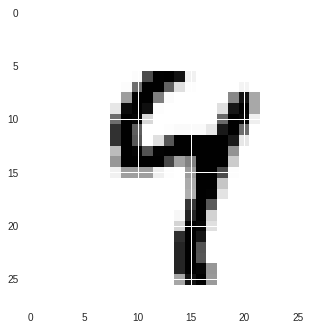

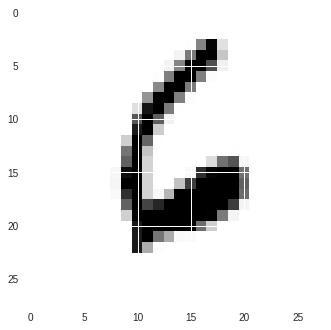

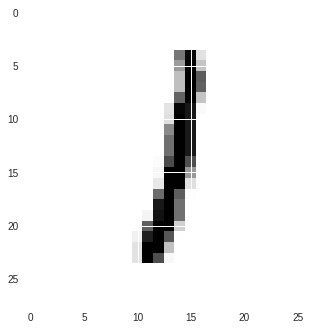

In [12]:
#An alternate method to display the first 5 images
for i in range(5):
    plt.imshow(train_images[i])
    plt.show()

In [16]:
#Now our neural metwork will have 784 units in the input layer and 10 units in the output layer 
#Let us take our NN to have 2 hidden layes with 256 units each
n_input=784
n_hidden_1=256
n_hidden_2=256
n_classes=10
#Now we assume our weights and biases to be a dictionary with keys as the layers
weights = {'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
           'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
           'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
          }

biases = {'h1': tf.Variable(tf.random_normal([n_hidden_1])),
           'h2': tf.Variable(tf.random_normal([n_hidden_2])),
           'out': tf.Variable(tf.random_normal([n_classes]))
          }




Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
#For the forward propagation we will be using the 'relu' function as the activation function at the first layer
#and second layer and no activation function is used at the output layer
def forward_propagation(x,weights,biases):
    input_layer1=tf.matmul(x,weights['h1'])+biases['h1']
    output_layer1=tf.nn.relu(input_layer1)
    
    input_layer2=tf.matmul(output_layer1,weights['h2'])+biases['h2']
    output_layer2=tf.nn.relu(input_layer2)
    
    input_output_layer=tf.matmul(output_layer2,weights['out'])+biases['out']
    output_output_layer=input_output_layer
    
    return output_output_layer

In [ ]:
#Now let us make predictions without optimising our code using random weights and biases
#for predicting we will have to call the forward propagation function
#Now our forward propagation code can accept testing as well as training data as parameters
#So let us create x as a placeholder of shape (_ , n_input)
#y will also be a palceholder of type integer as it has digits from 0-9 of shape (_ ,10)
x=tf.placeholder('float',shape=(None,n_input))
y=tf.placeholder("int32",shape=(None,n_classes))
pred=forward_propagation(x,weights,biases)





In [ ]:
#Now due to one hot encoding we need to predict the index of the maximum value obtained...hence we use the argmax function
#which requires a parameter as the axis to find the index having maximum value
predictions = tf.argmax(pred,1)
true_labels = tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)

In [37]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
predictions_eval,labels,correct_pred = sess.run([predictions,true_labels,correct_predictions], feed_dict={x:mnist.train.images,y:mnist.train.labels})
predictions_eval,labels,correct_pred



(array([5, 5, 0, ..., 1, 5, 5]),
 array([7, 3, 4, ..., 5, 6, 8]),
 array([False, False, False, ..., False, False, False]))

In [38]:
correct_pred.sum()
#Adds no of occurences of True in the array.

4826

In [ ]:
#Now our next step is to find the cost and optimise it so that accuracy increases
#This was done earlier by subtracting the gradients by back propagating .....
#But in tensorflow we don't need to do all this by ourselves
#We just need to find the cost and then use an inbuilt optimiser which will reduce our cost affecting the parameters on which cost depends
#The cost function we will be using here is the cross entropy function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [ ]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

In [ ]:
sess.run(tf.global_variables_initializer())

In [51]:

for i in range(25):
  c,_=sess.run([cost,optimize],feed_dict={x:mnist.train.images,y:mnist.train.labels})
  print(c)

876.0357
629.28217
503.58246
387.52386
266.30014
198.87537
183.09225
178.31342
164.28882
143.00288
123.97927
112.7308
107.52065
103.6829
98.938034
93.48791
88.174416
83.37424
79.41372
76.18596
73.26803
70.2208
67.0356
63.93369
61.241016


In [52]:
predictions = tf.argmax(pred,1)
true_labels = tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)
predictions_eval,labels,correct_pred = sess.run([predictions,true_labels,correct_predictions], feed_dict={x:mnist.train.images,y:mnist.train.labels})
predictions_eval,labels,correct_pred



(array([7, 3, 9, ..., 5, 6, 8]),
 array([7, 3, 4, ..., 5, 6, 8]),
 array([ True,  True, False, ...,  True,  True,  True]))

In [53]:
correct_pred.sum()

48007

In [54]:
#Accuracy obtained as there were 55000 images in training data
48007/55000

0.8728545454545454

In [ ]:
#Similarily we can see the results for testing data as well.